 22.05.2017 al 25.05.2017

In [1]:
import pandas as pd
import tools
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt

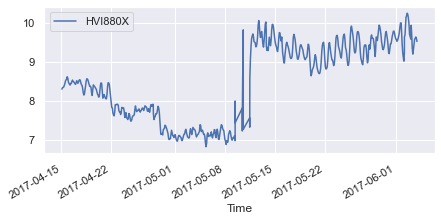

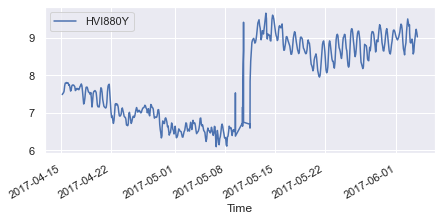

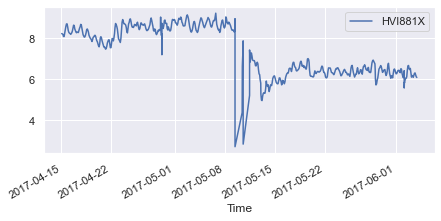

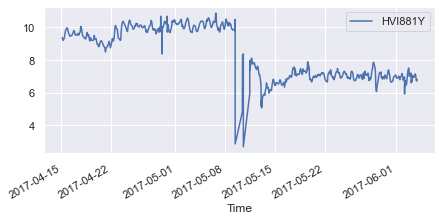

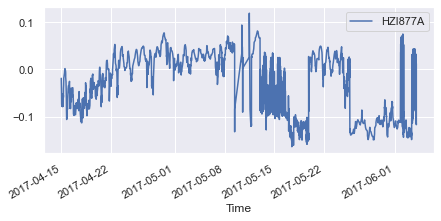

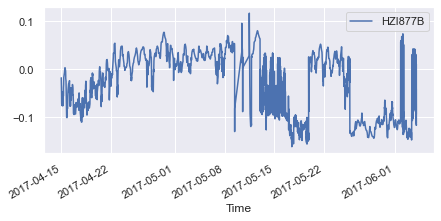

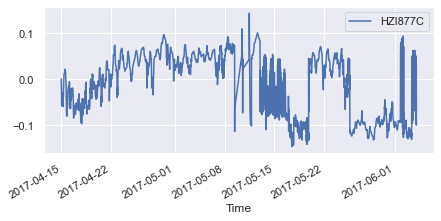

In [2]:
df_1 = pd.read_csv(r'..\data\untouched_data\compressor\2017\HVI880X.csv', sep=';')
df_2 = pd.read_csv(r'..\data\untouched_data\compressor\2017\HVI880Y.csv', sep=';')
df_3 = pd.read_csv(r'..\data\untouched_data\compressor\2017\HVI881X.csv', sep=';')
df_4 = pd.read_csv(r'..\data\untouched_data\compressor\2017\HVI881Y.csv', sep=';')
df_5 = pd.read_csv(r'..\data\untouched_data\compressor\2017\HZI877A.csv', sep=';')
df_6 = pd.read_csv(r'..\data\untouched_data\compressor\2017\HZI877B.csv', sep=';')
df_7 = pd.read_csv(r'..\data\untouched_data\compressor\2017\HZI877C.csv', sep=';')
df_1['Time'] = pd.to_datetime(df_1['Time'], format=tools.date_format)
df_2['Time'] = pd.to_datetime(df_2['Time'], format=tools.date_format)
df_3['Time'] = pd.to_datetime(df_3['Time'], format=tools.date_format)
df_4['Time'] = pd.to_datetime(df_4['Time'], format=tools.date_format)
df_5['Time'] = pd.to_datetime(df_5['Time'], format=tools.date_format)
df_6['Time'] = pd.to_datetime(df_6['Time'], format=tools.date_format)
df_7['Time'] = pd.to_datetime(df_7['Time'], format=tools.date_format)
splits = ['15/04/2017','01/05/2017','04/06/2017']
d_1 = datetime.strptime(splits[0], "%d/%m/%Y")
d_2 = datetime.strptime(splits[2], "%d/%m/%Y")
df_1 = df_1.set_index('Time').sort_index()[d_1:d_2]
df_2 = df_2.set_index('Time').sort_index()[d_1:d_2]
df_3 = df_3.set_index('Time').sort_index()[d_1:d_2]
df_4 = df_4.set_index('Time').sort_index()[d_1:d_2]
df_5 = df_5.set_index('Time').sort_index()[d_1:d_2]
df_6 = df_6.set_index('Time').sort_index()[d_1:d_2]
df_7 = df_7.set_index('Time').sort_index()[d_1:d_2]
df_1_s =  df_1[(np.abs(stats.zscore(df_1)) < 3).all(axis=1)]
df_2_s =  df_2[(np.abs(stats.zscore(df_2)) < 3).all(axis=1)]
df_3_s =  df_3[(np.abs(stats.zscore(df_3)) < 3).all(axis=1)]
df_4_s =  df_4[(np.abs(stats.zscore(df_4)) < 3).all(axis=1)]
df_5_s =  df_5[(np.abs(stats.zscore(df_5)) < 3).all(axis=1)]
df_6_s =  df_6[(np.abs(stats.zscore(df_6)) < 3).all(axis=1)]
df_7_s =  df_7[(np.abs(stats.zscore(df_7)) < 3).all(axis=1)]
tools.plot_df(df_1_s)
tools.plot_df(df_2_s)
tools.plot_df(df_3_s)
tools.plot_df(df_4_s)
tools.plot_df(df_5_s)
tools.plot_df(df_6_s)
tools.plot_df(df_7_s)

Train starts at 2017-04-15 00:22:25 and ends at 2017-04-30 23:27:13
Test starts at 2017-05-01 01:08:53 and ends at 2017-06-03 23:58:21


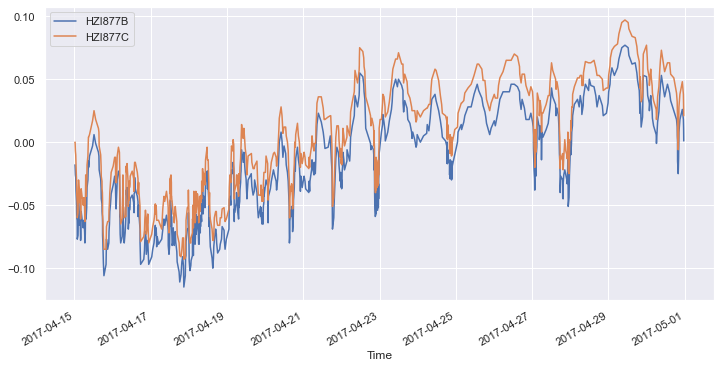

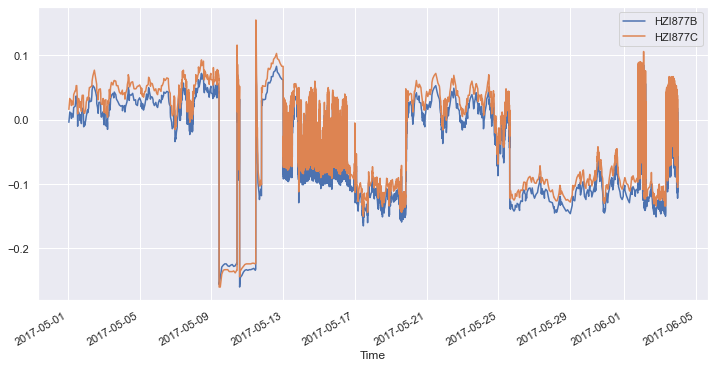

In [3]:
year=2017
df_list = [df_6, df_7]
dataset_train, dataset_test = tools.init_datasets_prepared(df_list, splits,resample=False, resample_time='5Min')
tools.plot_train(dataset_train)
tools.plot_train(dataset_test)

C:\Users\ian.palacin\Anaconda3\envs\new_nn\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Mahalanobis distance')

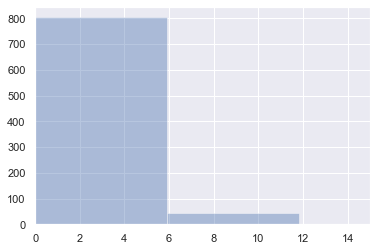

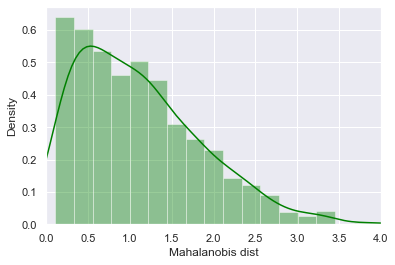

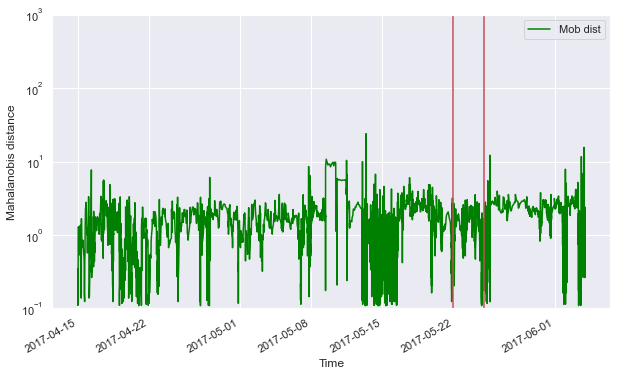

In [4]:
dist_test, dist_train, threshold, anomaly_alldata = tools.dists_and_anomalies(dataset_train.dropna(), dataset_test.dropna(), components=len(df_list))
tools.plot_M_distance_squared(dist_train, scale=15)
tools.plot_M_distance(dist_train)
tools.plot_anomaly_metric(anomaly_alldata)
plt.axvline(dt.datetime(2017, 5, 22), color='r')
plt.axvline(dt.datetime(2017, 5, 25), color='r')
plt.ylabel('Mahalanobis distance')

Text(0, 0.5, 'Mahalanobis distance')

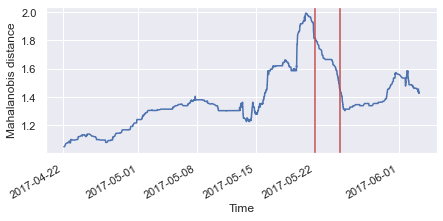

In [6]:
mob_dist = anomaly_alldata['Mob dist']
f,ax=plt.subplots(figsize=(7,3))
mob_dist.rolling(window=1000,center=True).median().plot(ax=ax)
plt.axvline(dt.datetime(2017, 5, 22), color='r')
plt.axvline(dt.datetime(2017, 5, 25), color='r')
plt.ylabel('Mahalanobis distance')

Train starts at 2017-04-15 00:31:34 and ends at 2017-04-30 22:03:51
Test starts at 2017-05-01 00:03:49 and ends at 2017-06-14 22:50:45


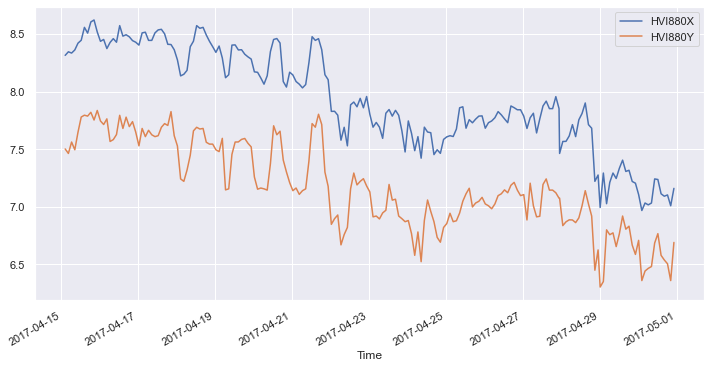

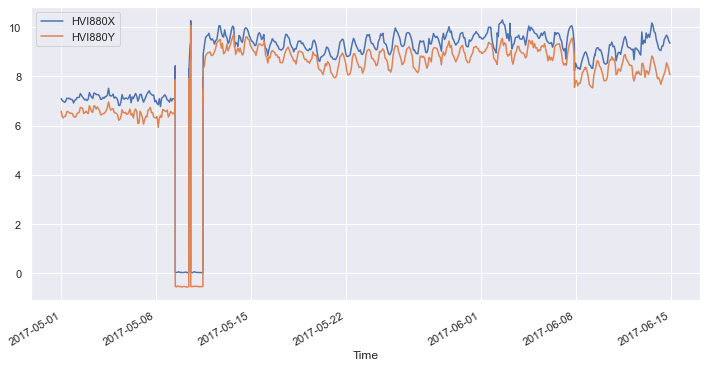

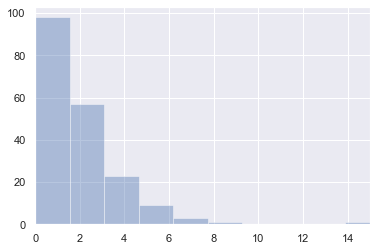

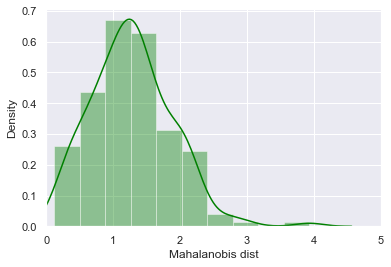

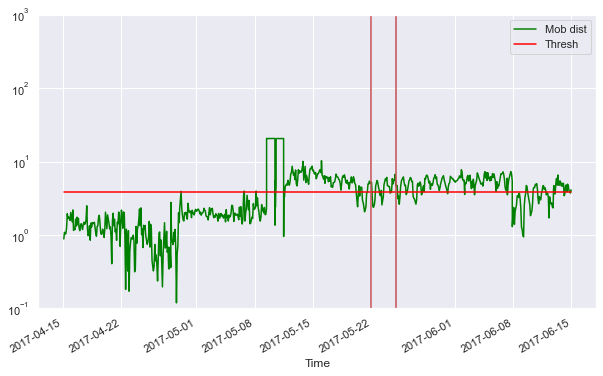

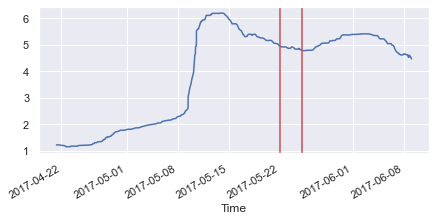

In [36]:
year=2017
df_list = [df_1, df_2]
dataset_train, dataset_test = tools.init_datasets_prepared(df_list, splits,resample=False, resample_time='5Min')
tools.plot_train(dataset_train)
tools.plot_train(dataset_test)
dist_test, dist_train, threshold, anomaly_alldata = tools.dists_and_anomalies(dataset_train.dropna(), dataset_test.dropna(), components=len(df_list))
tools.plot_M_distance_squared(dist_train, scale=15)
tools.plot_M_distance(dist_train)
tools.plot_anomaly_metric(anomaly_alldata)
plt.axvline(dt.datetime(2017, 5, 22), color='r')
plt.axvline(dt.datetime(2017, 5, 25), color='r')
mob_dist = anomaly_alldata['Mob dist']
f,ax=plt.subplots(figsize=(7,3))
mob_dist.rolling(window=150,center=True).median().plot(ax=ax)
plt.axvline(dt.datetime(2017, 5, 22), color='r')
plt.axvline(dt.datetime(2017, 5, 25), color='r')

Train starts at 2017-04-15 00:03:06 and ends at 2017-04-30 23:18:04
Test starts at 2017-05-01 01:18:02 and ends at 2017-06-14 23:44:38


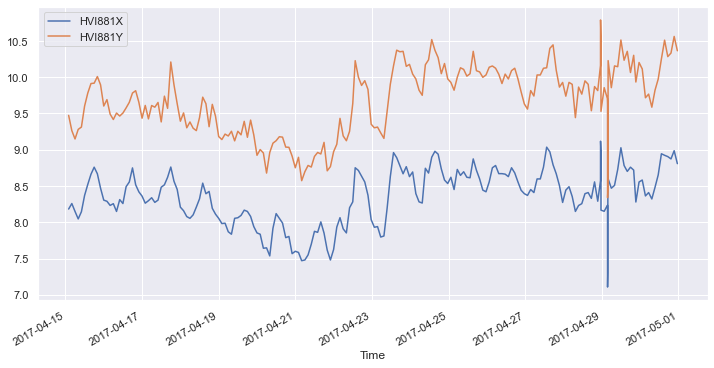

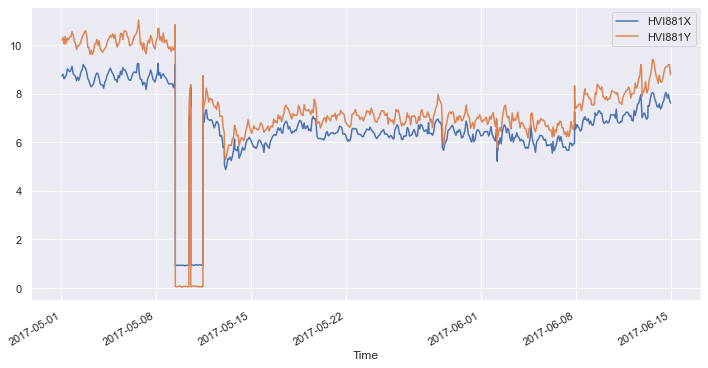

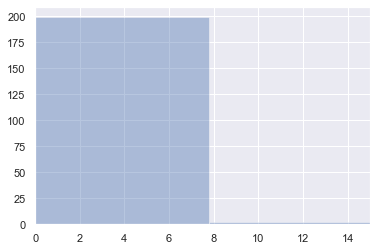

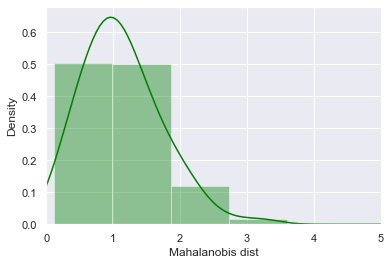

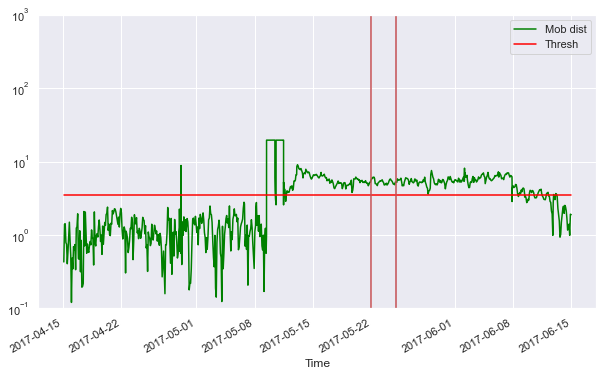

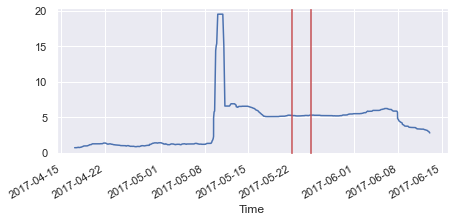

In [40]:
year=2017
df_list = [df_3, df_4]
dataset_train, dataset_test = tools.init_datasets_prepared(df_list, splits,resample=False, resample_time='5Min')
tools.plot_train(dataset_train)
tools.plot_train(dataset_test)
dist_test, dist_train, threshold, anomaly_alldata = tools.dists_and_anomalies(dataset_train.dropna(), dataset_test.dropna(), components=len(df_list))
tools.plot_M_distance_squared(dist_train, scale=15)
tools.plot_M_distance(dist_train)
tools.plot_anomaly_metric(anomaly_alldata)
plt.axvline(dt.datetime(2017, 5, 22), color='r')
plt.axvline(dt.datetime(2017, 5, 25), color='r')
mob_dist = anomaly_alldata['Mob dist']
f,ax=plt.subplots(figsize=(7,3))
mob_dist.rolling(window=50,center=True).median().plot(ax=ax)
plt.axvline(dt.datetime(2017, 5, 22), color='r')
plt.axvline(dt.datetime(2017, 5, 25), color='r')

Train starts at 2017-04-15 00:22:25 and ends at 2017-04-30 23:27:13
Test starts at 2017-05-01 01:08:53 and ends at 2017-06-14 23:58:52


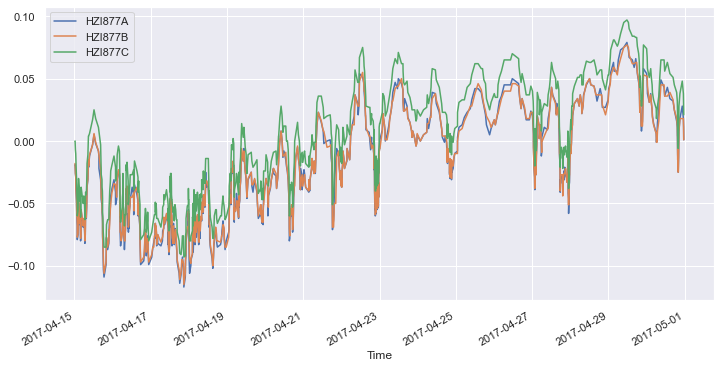

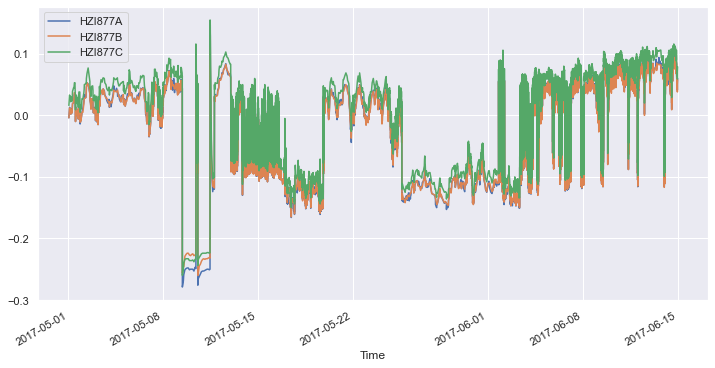

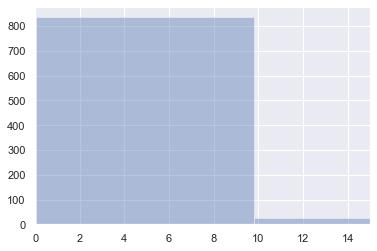

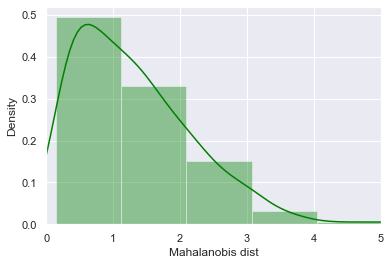

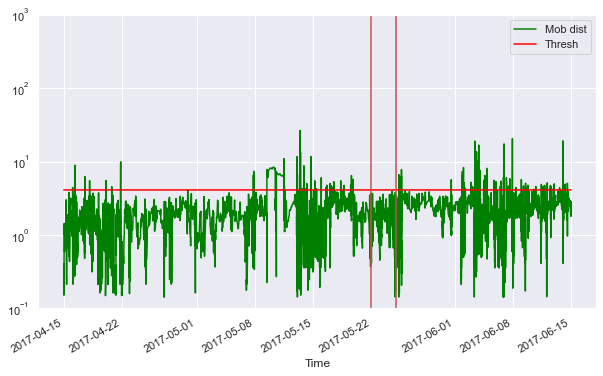

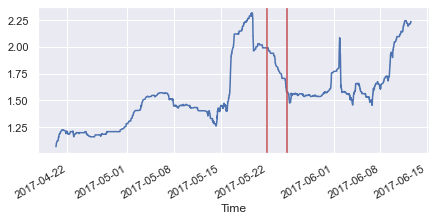

In [44]:
year=2017
df_list = [df_5, df_6, df_7]
dataset_train, dataset_test = tools.init_datasets_prepared(df_list, splits,resample=False, resample_time='5Min')
tools.plot_train(dataset_train)
tools.plot_train(dataset_test)
dist_test, dist_train, threshold, anomaly_alldata = tools.dists_and_anomalies(dataset_train.dropna(), dataset_test.dropna(), components=len(df_list))
tools.plot_M_distance_squared(dist_train, scale=15)
tools.plot_M_distance(dist_train)
tools.plot_anomaly_metric(anomaly_alldata)
plt.axvline(dt.datetime(2017, 5, 22), color='r')
plt.axvline(dt.datetime(2017, 5, 25), color='r')
mob_dist = anomaly_alldata['Mob dist']
f,ax=plt.subplots(figsize=(7,3))
mob_dist.rolling(window=800,center=True).median().plot(ax=ax)
plt.axvline(dt.datetime(2017, 5, 22), color='r')
plt.axvline(dt.datetime(2017, 5, 25), color='r')